In [1]:
using CairoMakie

import LilGuys as lguys
using Arya

In [29]:
function sigma_axis(; kwargs...) 
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}"
		;kwargs...
	)

	return fig, ax
end

sigma_axis (generic function with 1 method)

## V=32, r=5.6 (the initial model)

In [50]:
model_dir = "/astro/dboyea/sculptor/orbits/orbit1/1e6/V32_r5.4/stars/"


"/astro/dboyea/sculptor/orbits/orbit1/1e6/V32_r5.4/stars/"

In [51]:
models = [
    #"exp2d_rs0.13",
    "king",
]

1-element Vector{String}:
 "king"

In [55]:
names_i = [model_dir] .* models .* ["_stars_1_profile.toml"]
names_f = [model_dir] .* models .* ["_stars_profile.toml"]

1-element Vector{String}:
 "/astro/dboyea/sculptor/orbits/o" ⋯ 17 bytes ⋯ "4/stars/king_stars_profile.toml"

In [56]:
profiles = lguys.ObsProfile.(names_f);
profiles_i = lguys.ObsProfile.(names_i);

In [ ]:
let
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1, 2.5), (-5, 1)),
		xgridvisible=false,
		ygridvisible=false
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		color=:black,
        label="J+24",
	)

	x = LinRange(-1, 2, 1000)
	r = 10 .^ x
	y = lguys.calc_ρ.(prof_fit, r)

	y ./= y[1]

	#lines!(x, log10.(y))

	i = 1
	lines!(profiles_i[i].log_r, profiles_i[i].log_Sigma, 
			label="initial", linestyle=:dot)
	
	lines!(profiles[i].log_r, profiles[i].log_Sigma, 
			label="final")

	axislegend()

	fig
end

## V=32, r=2.4

In [19]:
models = [
    #"exp2d_rs0.13",
    "king_rs0.15",
]

1-element Vector{String}:
 "king_rs0.15"

In [24]:
model_dir = "/astro/dboyea/sculptor/orbits/orbit1/1e6/V32_r2.4/stars/"
names_i = [model_dir] .* models .* ["_1_profile.toml"]
names_f = [model_dir] .* models .* ["_profile.toml"]

1-element Vector{String}:
 "/astro/dboyea/sculptor/orbits/o" ⋯ 18 bytes ⋯ "/stars/king_rs0.15_profile.toml"

In [28]:
profiles = lguys.ObsProfile.(names_f);

In [27]:
profiles_i = lguys.ObsProfile.(names_i);

In [31]:
prof_expected = lguys.ObsProfile("/astro/dboyea/sculptor/fiducial_sample_profile.toml");

In [32]:
log_r_label = "log r / arcmin"

"log r / arcmin"

In [35]:
prof_fit = lguys.KingProfile(M=1, R_s=11, R_t=25)

LilGuys.KingProfile(0.009827222561347682, 11.0, 25.0)

In [38]:
r_b = 76

76

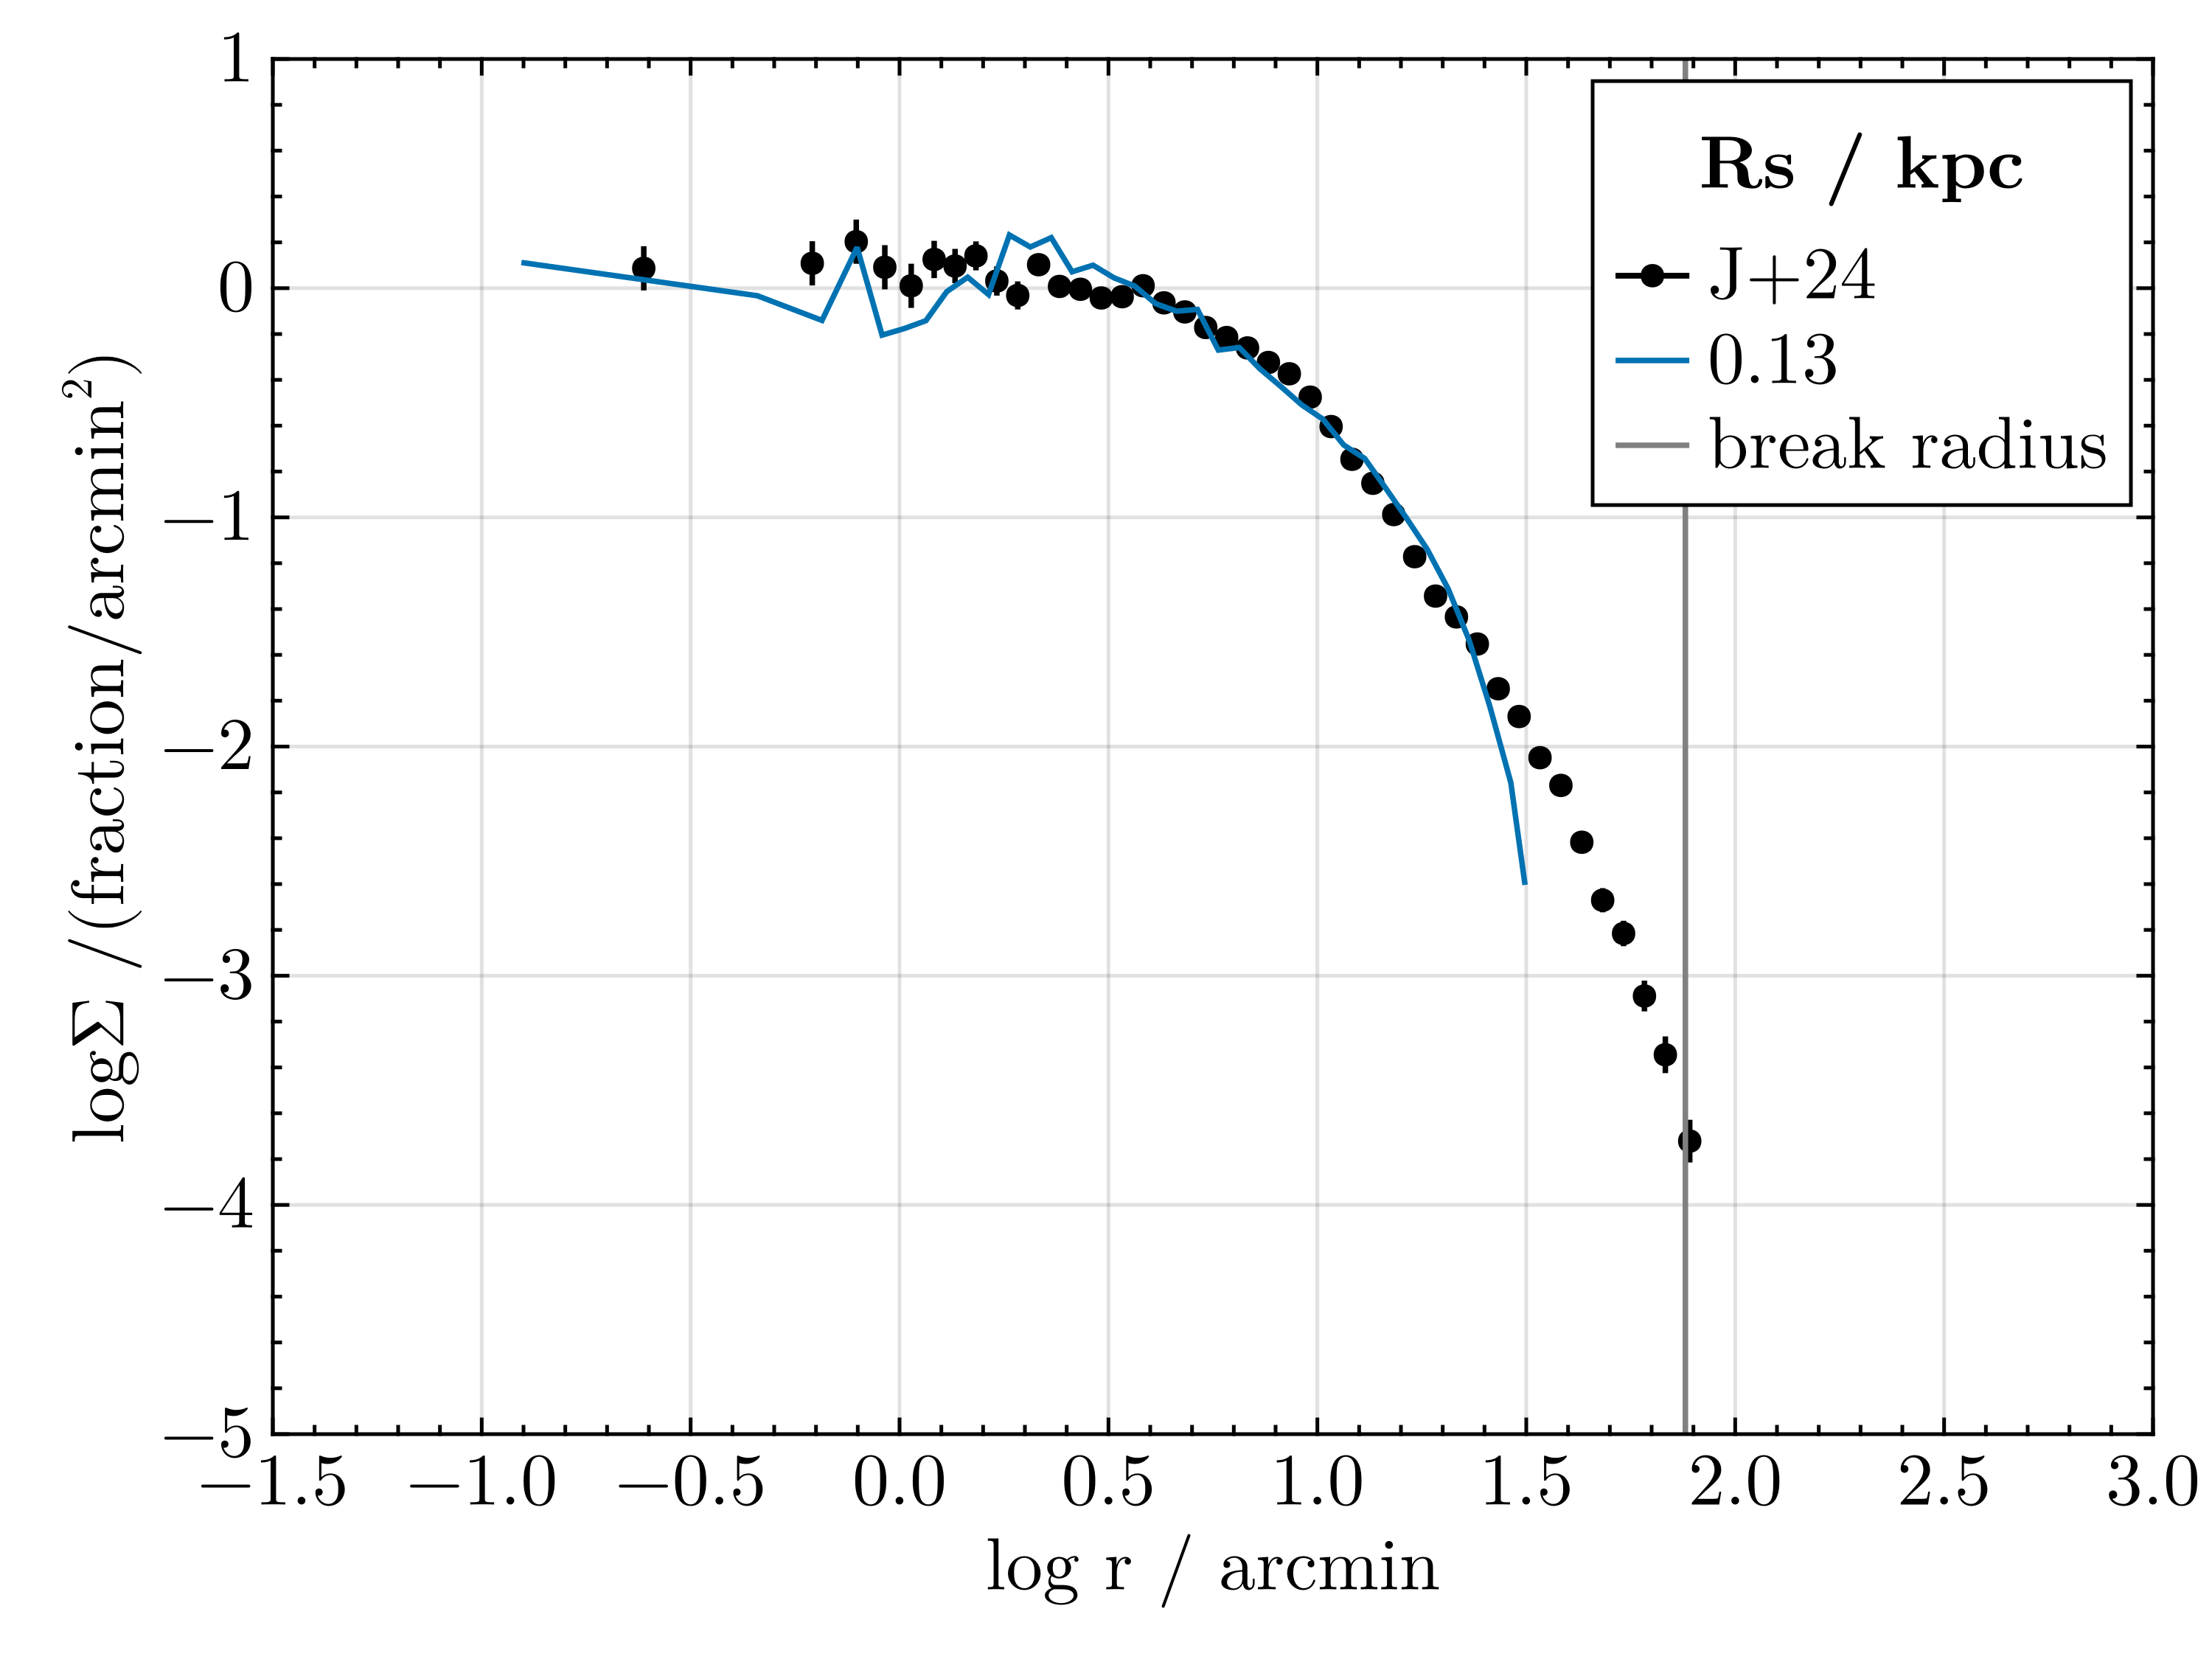

In [39]:
let 
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1.5, 3), (-5, 1))
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		label="J+24",
		color=:black
	)

	
	for i in eachindex(Rs)
		profile = profiles[i]

		label = "$(Rs[i])"
		lines!(profile.log_r, profile.log_Sigma, 
			label=label)
	end
	

	
	vlines!(log10(r_b), color=:grey, label="break radius")
	axislegend("Rs / kpc")

	fig
end

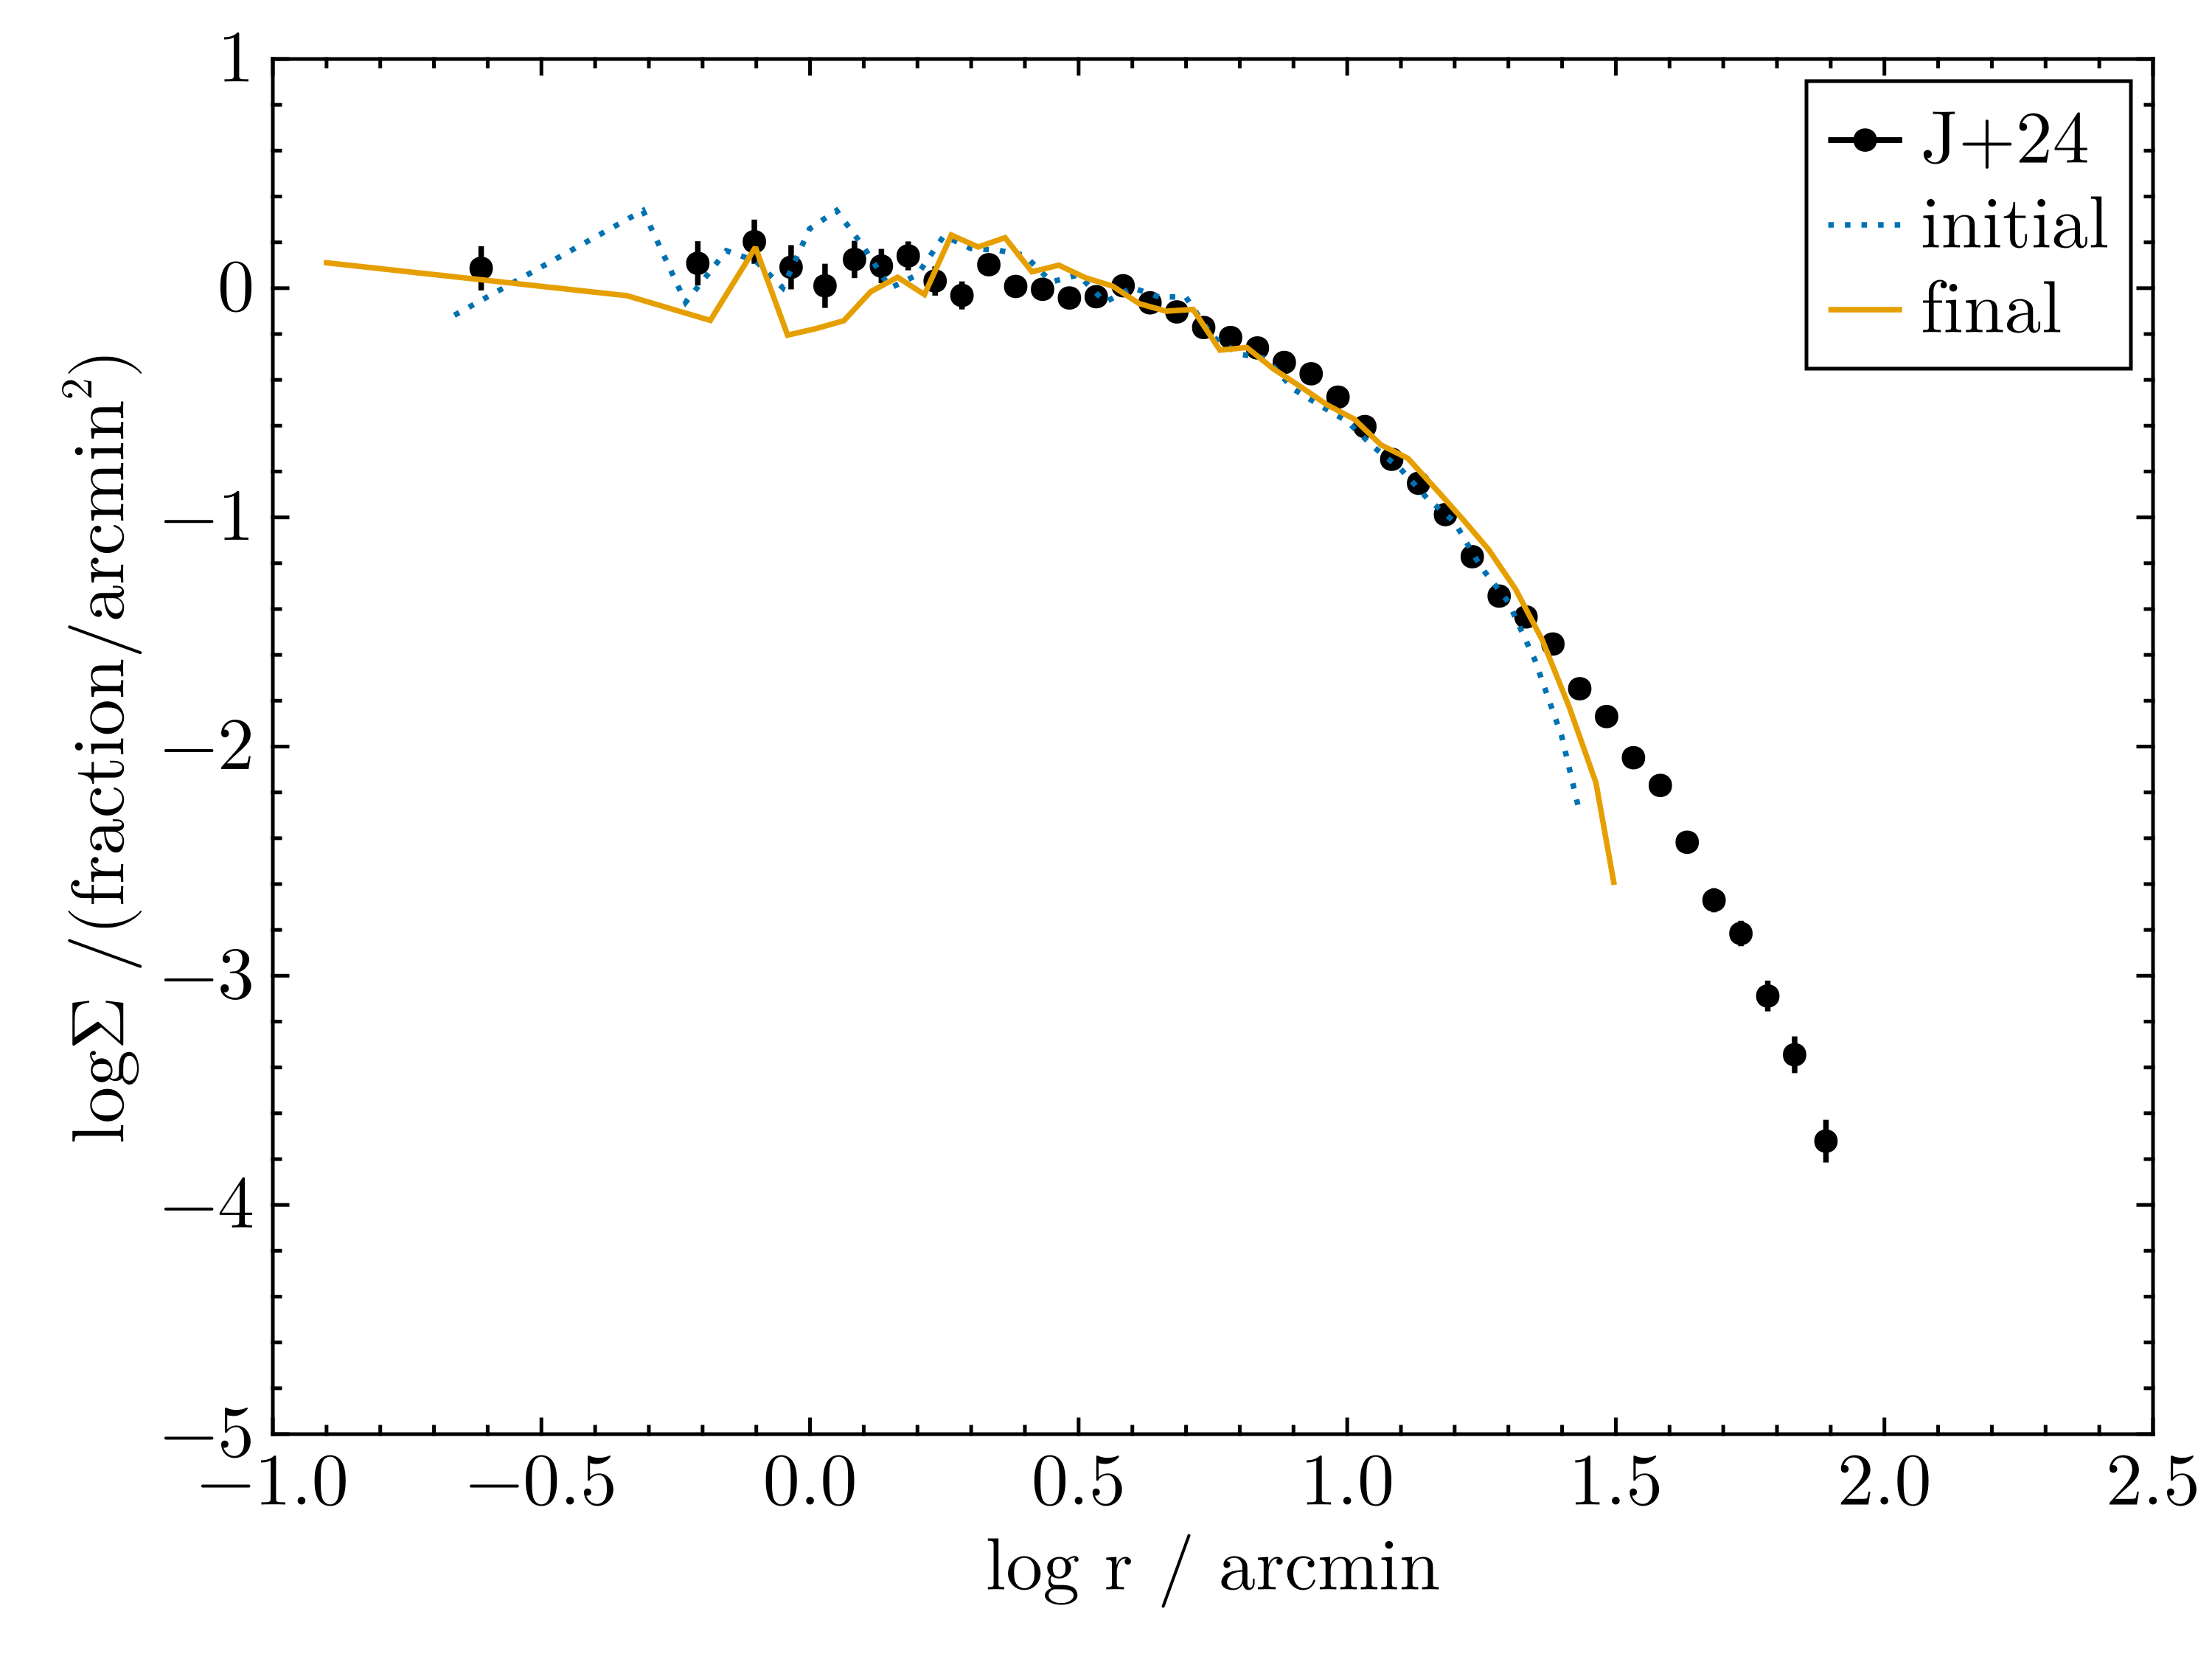

In [41]:
let
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1, 2.5), (-5, 1)),
		xgridvisible=false,
		ygridvisible=false
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		color=:black,
        label="J+24",
	)

	x = LinRange(-1, 2, 1000)
	r = 10 .^ x
	y = lguys.calc_ρ.(prof_fit, r)

	y ./= y[1]

	#lines!(x, log10.(y))

	i = 1
	lines!(profiles_i[i].log_r, profiles_i[i].log_Sigma, 
			label="initial", linestyle=:dot)
	
	lines!(profiles[i].log_r, profiles[i].log_Sigma, 
			label="final")

	axislegend()

	fig
end